In [ ]:
import pandas as pd

###     **1. Understand the Data**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Resume_Dataset.csv to Resume_Dataset.csv


In [ ]:
df = pd.read_csv("Resume_Dataset.csv")

In [ ]:
df_raw = df.copy()

In [ ]:
print(df.shape)

(2000, 5)


In [ ]:
print(df.columns)

Index(['Name', 'Category', 'Education', 'Skills', 'Experience'], dtype='object')


In [ ]:
df.head()

,Name,Category,Education,Skills,Experience
0,Rhonda Richards,Python Developer,MTECH,"pandas, python, django",3.1
1,Anthony Sanchez MD,Tableau Developer,MBA,"sql, dashboards, data visualization, tableau, ...",3.2
2,Angela Mejia,Hadoop,MTECH,"pig, mapreduce, hive, ,",0.5
3,Anne Park DDS,HR,MBA,"interviewing, ms excel, communication, employe...",7.7
4,Lori Murray,SAP Developer,BTECH,"erp, sap hana, sap, fiori",13.2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        2000 non-null   object 
 1   Category    1987 non-null   object 
 2   Education   2000 non-null   object 
 3   Skills      1979 non-null   object 
 4   Experience  1967 non-null   float64
dtypes: float64(1), object(4)
memory usage: 78.3+ KB


In [ ]:
df.describe(include='all')

,Name,Category,Education,Skills,Experience
count,2000,1987,2000,1979,1967.000000
unique,1965,26,7,1755,NaN
top,Michael Smith,PMO,BTECH,"construction, structural analysis, autocad",NaN
freq,3,96,676,3,NaN
mean,NaN,NaN,NaN,NaN,7.432130
std,NaN,NaN,NaN,NaN,4.386444
min,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,3.700000
50%,NaN,NaN,NaN,NaN,7.400000
75%,NaN,NaN,NaN,NaN,11.200000


In [ ]:
df['Category'].value_counts()

,count
Category,
PMO,96
Business Analyst,89
Operations Manager,87
Hadoop,85
SAP Developer,85
Automation Testing,84
Sales,83
Engineer,82
HR,81


###     **2. Data Preprocessing**

#### **i) Data Cleaning**

#####     **a. Handle Missing Values**

In [ ]:
df.isnull().sum()

,0
Name,0
Category,13
Education,0
Skills,21
Experience,33


In [ ]:
df = df.dropna(subset=['Category', 'Skills'])

In [ ]:
df.isnull().sum()

,0
Name,0
Category,0
Education,0
Skills,0
Experience,32


In [ ]:
df['Experience'] = df['Experience'].fillna(df['Experience'].median())

In [ ]:
df.isnull().sum()

,0
Name,0
Category,0
Education,0
Skills,0
Experience,0


#####     **b. Clean Textual Data**

In [ ]:
import re
import string

def clean_text(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = text.replace('\n', ' ').replace('\r', ' ')
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = ''.join([ch for ch in text if not ch.isdigit()])
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    return text.strip()

df['Skills'] = df['Skills'].apply(clean_text)
df['Education'] = df['Education'].apply(clean_text)

#####     **c. Drop Duplicates**

In [ ]:
df = df.drop_duplicates()


In [ ]:
print("Duplicate rows:", df.duplicated().sum())

Duplicate rows: 0


In [ ]:
print("Total rows:", df.shape[0])

Total rows: 1967


#### **ii) Feature Engineering**

In [ ]:
df['Experience'] = df['Experience'].round().astype(int)


In [ ]:
empty_skills = df[df['Skills'].str.strip() == '']
empty_edu = df[df['Education'].str.strip() == '']

print(f"Empty skills: {len(empty_skills)}")
print(f"Empty education: {len(empty_edu)}")



Empty skills: 0
Empty education: 0


In [ ]:
df['Resume'] = df['Skills'] + ' ' + df['Education']

In [ ]:
df_preprocesed = df.copy()

###     **3. Exploratory Data Analysis**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

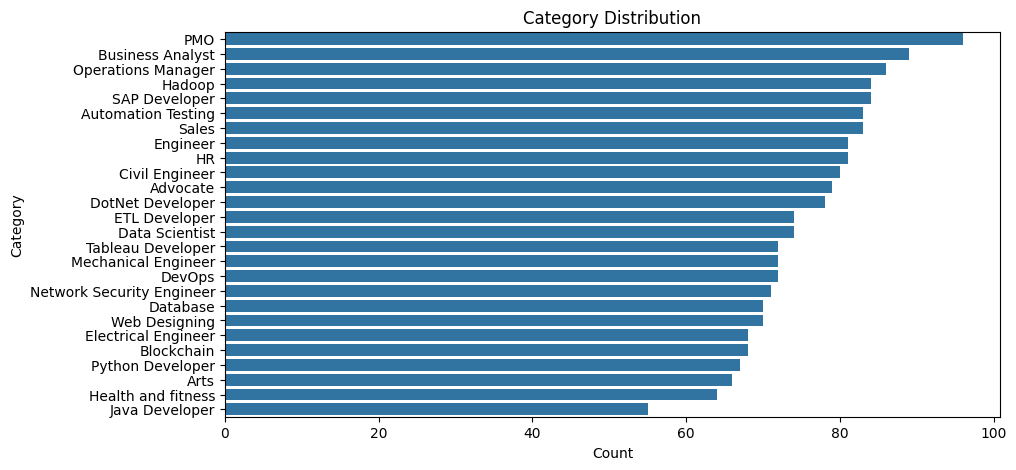

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, y='Category', order=df['Category'].value_counts().index)
plt.title('Category Distribution')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()



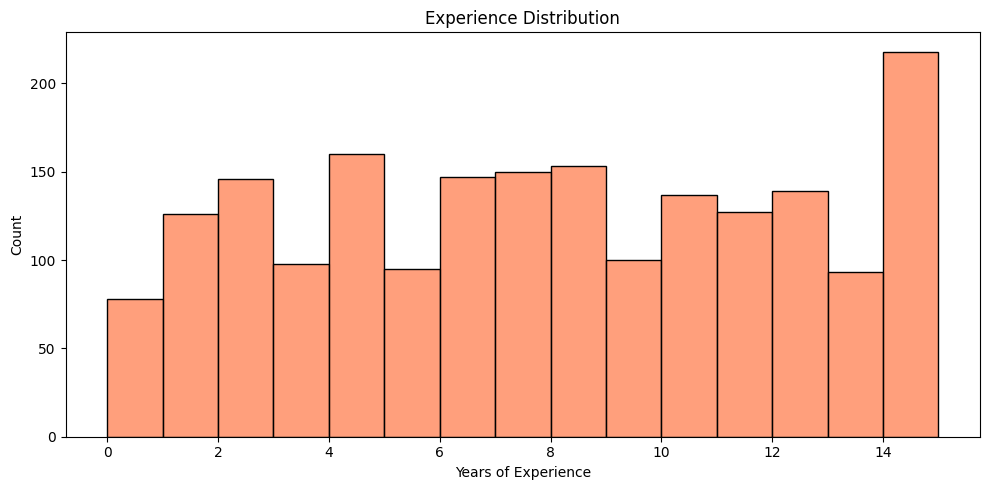

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='Experience', bins=15, color='coral', edgecolor='black')

plt.title('Experience Distribution')
plt.xlabel('Years of Experience')
plt.ylabel('Count')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


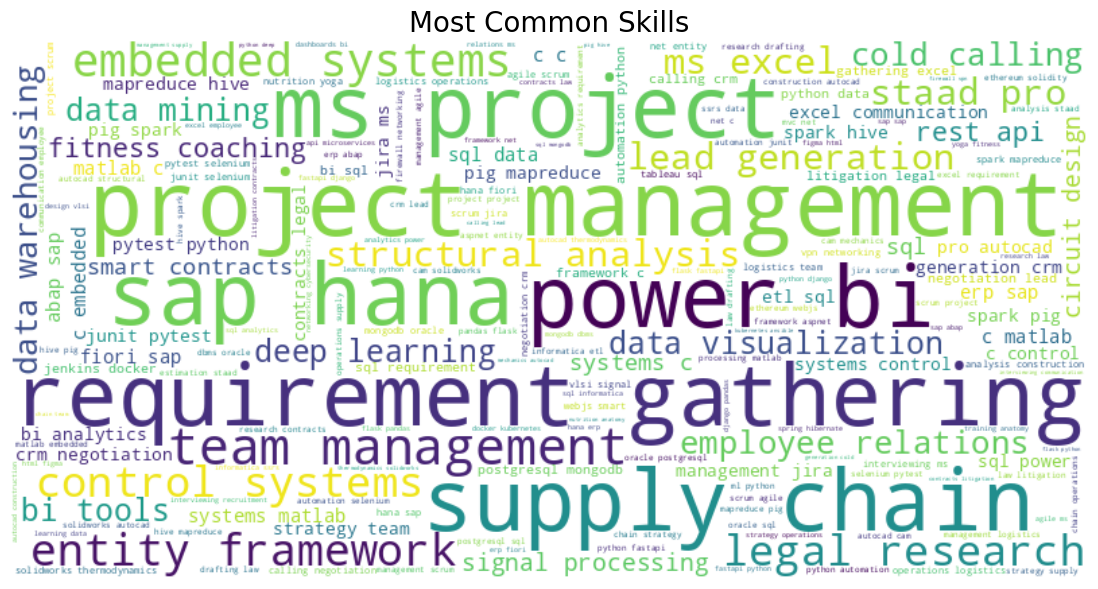

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join(df['Skills'].dropna().tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Skills", fontsize=20)
plt.show()


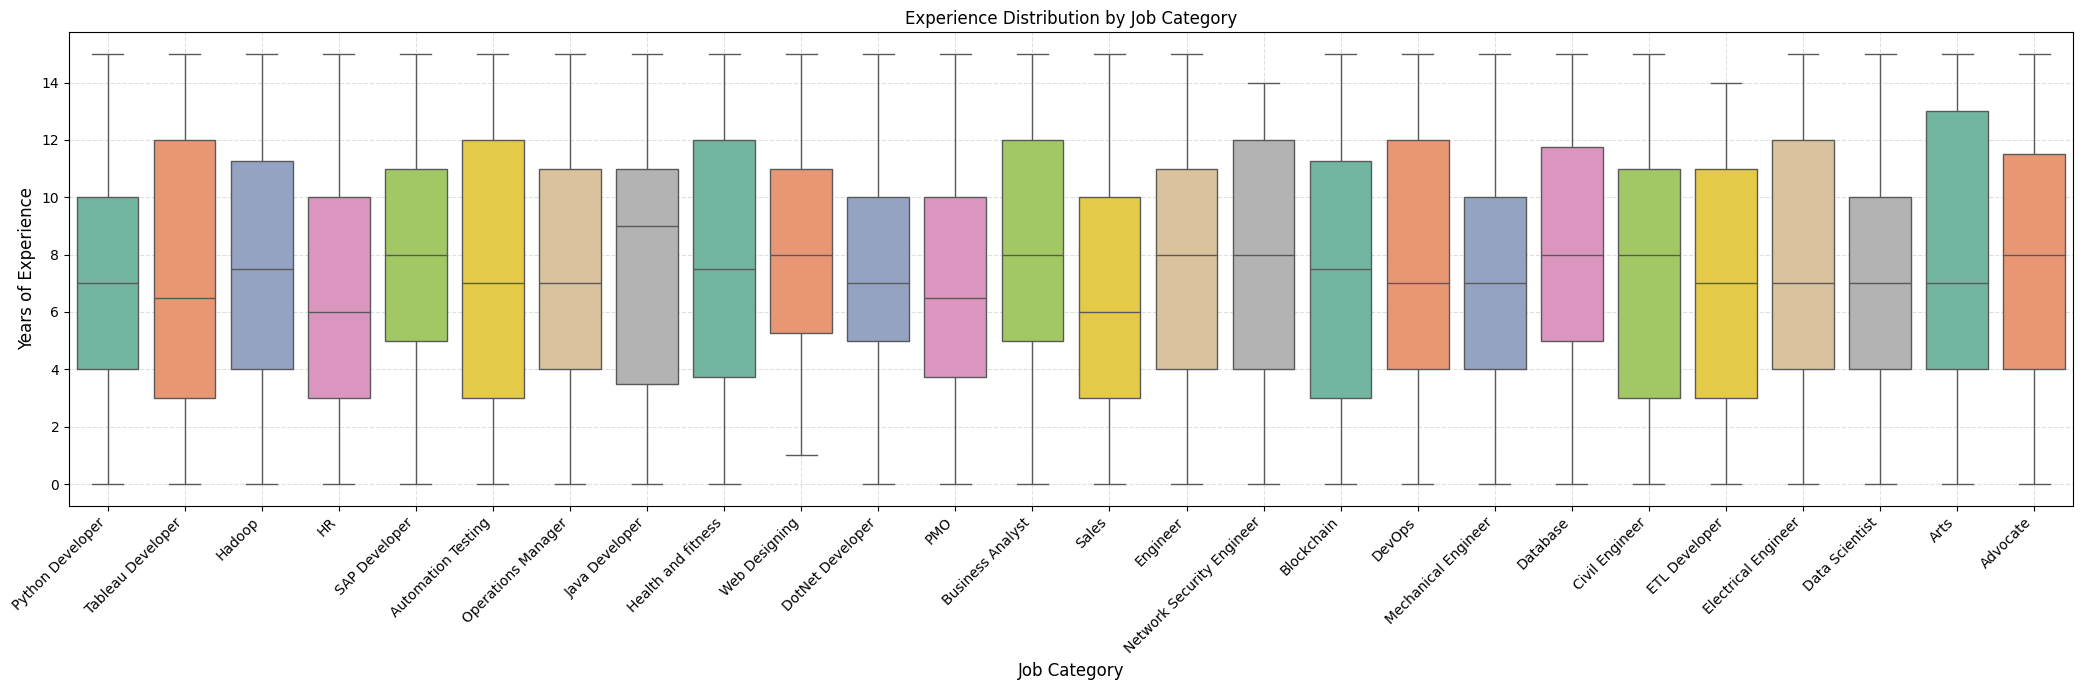

In [ ]:
plt.figure(figsize=(21, 7))
sns.boxplot(data=df, x='Category', y='Experience', hue='Category', palette='Set2')

plt.title('Experience Distribution by Job Category')
plt.xlabel('Job Category', fontsize=12)
plt.ylabel('Years of Experience', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()


###     **4. Model Building & Evaluation**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import numpy as np


In [ ]:
from sklearn.model_selection import train_test_split

X_train_text, X_test_text, y_train, y_test = train_test_split(
    df['Resume'], df['Category'], test_size=0.2, stratify=df['Category'], random_state=42
)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=7000, stop_words='english', ngram_range=(1, 2))
X_train = tfidf.fit_transform(X_train_text)
X_test = tfidf.transform(X_test_text)

In [ ]:
import warnings
from sklearn.exceptions import UndefinedMetricWarning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

from sklearn.metrics import (
    accuracy_score, classification_report,
    confusion_matrix, ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt

def evaluate_model(model, X_test, y_test, results, model_name="Model"):
    print(f"\n=== Evaluation: {model_name} ===")

    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.4f}\n")

    # Get classification report as dict and string
    report_dict = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
    report_str = classification_report(y_test, y_pred, zero_division=0)

    print("Classification Report:")
    print(report_str)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred, labels=sorted(set(y_test)))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sorted(set(y_test)))

    plt.figure(figsize=(12, 12))
    disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

    # Save results to dictionary
    results[model_name] = {
        "accuracy": acc,
        "precision": report_dict["weighted avg"]["precision"],
        "recall": report_dict["weighted avg"]["recall"],
        "f1_score": report_dict["weighted avg"]["f1-score"]
    }



=== Evaluation: Logistic Regression ===
Accuracy: 0.9061

Classification Report:
                           precision    recall  f1-score   support

                 Advocate       0.84      1.00      0.91        16
                     Arts       1.00      0.92      0.96        13
       Automation Testing       0.88      0.88      0.88        17
               Blockchain       0.92      0.79      0.85        14
         Business Analyst       0.95      1.00      0.97        18
           Civil Engineer       1.00      0.88      0.93        16
           Data Scientist       1.00      1.00      1.00        15
                 Database       0.76      0.93      0.84        14
                   DevOps       0.92      0.86      0.89        14
         DotNet Developer       0.88      0.94      0.91        16
            ETL Developer       0.82      0.93      0.88        15
      Electrical Engineer       0.93      0.93      0.93        14
                 Engineer       0.93      0.88

<Figure size 1200x1200 with 0 Axes>

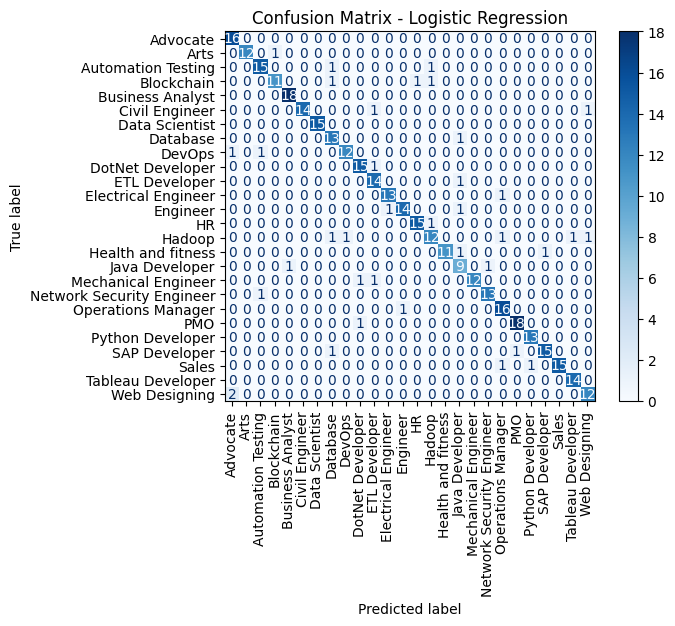


=== Evaluation: Random Forest ===
Accuracy: 0.8782

Classification Report:
                           precision    recall  f1-score   support

                 Advocate       0.84      1.00      0.91        16
                     Arts       1.00      0.92      0.96        13
       Automation Testing       0.79      0.88      0.83        17
               Blockchain       0.85      0.79      0.81        14
         Business Analyst       0.94      0.94      0.94        18
           Civil Engineer       1.00      0.81      0.90        16
           Data Scientist       0.94      1.00      0.97        15
                 Database       0.76      0.93      0.84        14
                   DevOps       0.92      0.86      0.89        14
         DotNet Developer       0.87      0.81      0.84        16
            ETL Developer       0.78      0.93      0.85        15
      Electrical Engineer       0.93      0.93      0.93        14
                 Engineer       0.93      0.88      

<Figure size 1200x1200 with 0 Axes>

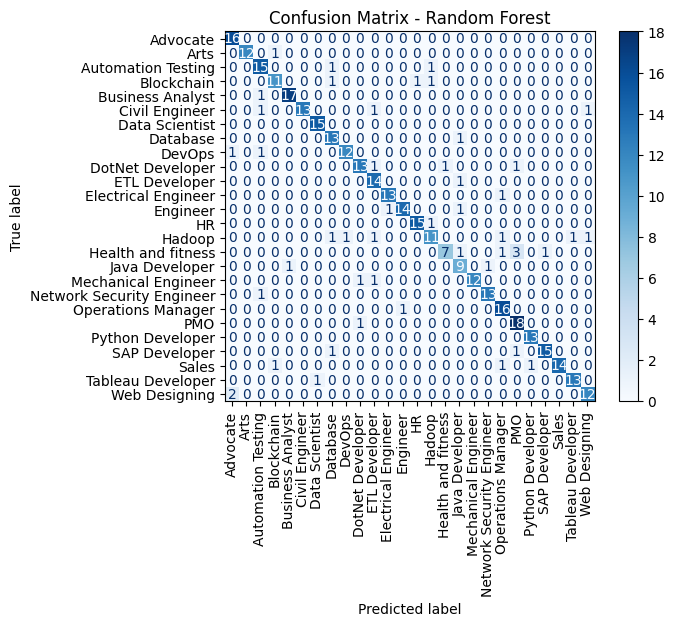


=== Evaluation: Gradient Boosting ===
Accuracy: 0.8350

Classification Report:
                           precision    recall  f1-score   support

                 Advocate       0.83      0.94      0.88        16
                     Arts       0.92      0.92      0.92        13
       Automation Testing       0.79      0.88      0.83        17
               Blockchain       0.77      0.71      0.74        14
         Business Analyst       0.84      0.89      0.86        18
           Civil Engineer       0.93      0.81      0.87        16
           Data Scientist       0.94      1.00      0.97        15
                 Database       0.73      0.79      0.76        14
                   DevOps       0.92      0.79      0.85        14
         DotNet Developer       0.81      0.81      0.81        16
            ETL Developer       0.78      0.93      0.85        15
      Electrical Engineer       1.00      0.93      0.96        14
                 Engineer       0.93      0.88  

<Figure size 1200x1200 with 0 Axes>

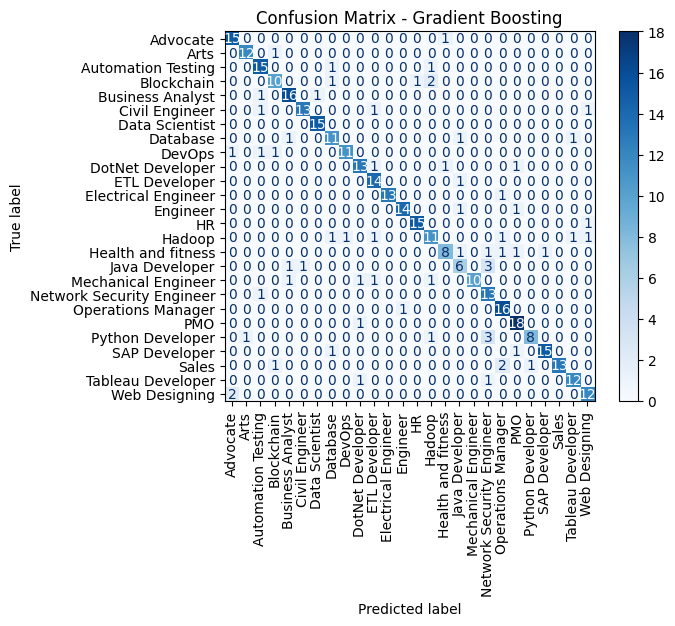


=== Evaluation: AdaBoost ===
Accuracy: 0.8426

Classification Report:
                           precision    recall  f1-score   support

                 Advocate       0.84      1.00      0.91        16
                     Arts       1.00      0.92      0.96        13
       Automation Testing       0.86      0.71      0.77        17
               Blockchain       0.92      0.79      0.85        14
         Business Analyst       0.95      1.00      0.97        18
           Civil Engineer       1.00      0.81      0.90        16
           Data Scientist       1.00      0.73      0.85        15
                 Database       0.80      0.86      0.83        14
                   DevOps       0.92      0.79      0.85        14
         DotNet Developer       0.88      0.88      0.88        16
            ETL Developer       0.82      0.93      0.88        15
      Electrical Engineer       1.00      0.93      0.96        14
                 Engineer       0.93      0.88      0.90 

<Figure size 1200x1200 with 0 Axes>

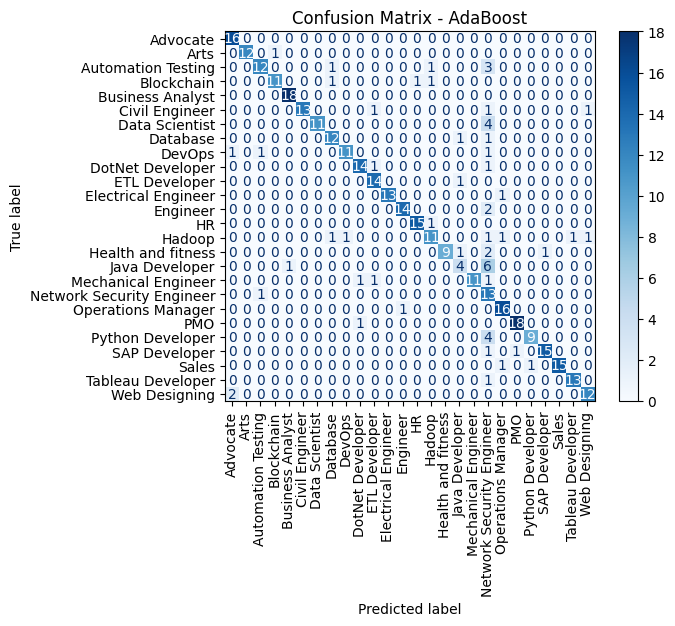


=== Evaluation: Naive Bayes ===
Accuracy: 0.9086

Classification Report:
                           precision    recall  f1-score   support

                 Advocate       0.84      1.00      0.91        16
                     Arts       1.00      0.92      0.96        13
       Automation Testing       0.88      0.88      0.88        17
               Blockchain       0.92      0.79      0.85        14
         Business Analyst       0.95      1.00      0.97        18
           Civil Engineer       1.00      0.88      0.93        16
           Data Scientist       1.00      1.00      1.00        15
                 Database       0.76      0.93      0.84        14
                   DevOps       0.92      0.86      0.89        14
         DotNet Developer       0.88      0.94      0.91        16
            ETL Developer       0.82      0.93      0.88        15
      Electrical Engineer       1.00      0.93      0.96        14
                 Engineer       0.94      0.94      0.

<Figure size 1200x1200 with 0 Axes>

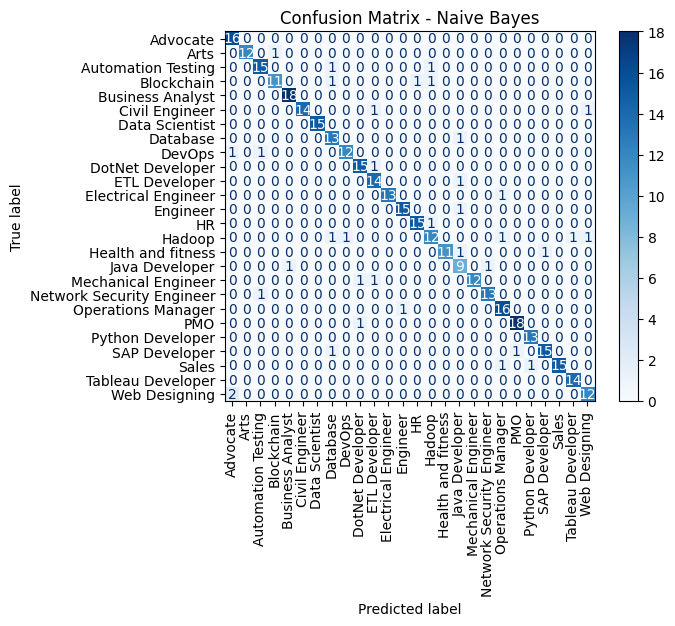


=== Evaluation: SVM ===
Accuracy: 0.9061

Classification Report:
                           precision    recall  f1-score   support

                 Advocate       0.84      1.00      0.91        16
                     Arts       1.00      0.92      0.96        13
       Automation Testing       0.88      0.88      0.88        17
               Blockchain       0.92      0.79      0.85        14
         Business Analyst       0.95      1.00      0.97        18
           Civil Engineer       1.00      0.88      0.93        16
           Data Scientist       1.00      1.00      1.00        15
                 Database       0.76      0.93      0.84        14
                   DevOps       0.92      0.86      0.89        14
         DotNet Developer       0.88      0.94      0.91        16
            ETL Developer       0.82      0.93      0.88        15
      Electrical Engineer       0.93      0.93      0.93        14
                 Engineer       0.93      0.88      0.90      

<Figure size 1200x1200 with 0 Axes>

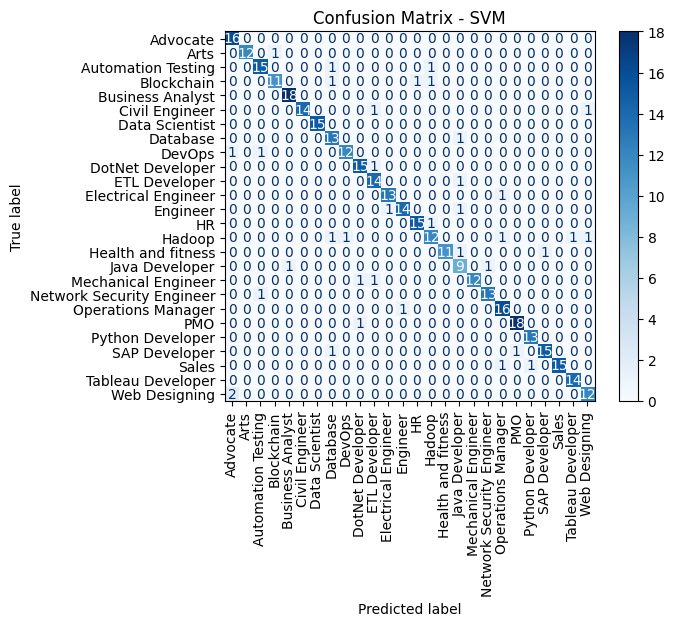

In [ ]:
results = {}

# Logistic Regression
logreg_model = LogisticRegression(max_iter=1000, random_state=42).fit(X_train, y_train)
evaluate_model(logreg_model, X_test, y_test, results, model_name="Logistic Regression")

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42).fit(X_train, y_train)
evaluate_model(rf_model, X_test, y_test, results, model_name="Random Forest")

# Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42).fit(X_train, y_train)
evaluate_model(gb_model, X_test, y_test, results, model_name="Gradient Boosting")

# AdaBoost
ada_model = AdaBoostClassifier(n_estimators=100, random_state=42).fit(X_train, y_train)
evaluate_model(ada_model, X_test, y_test, results, model_name="AdaBoost")

# Naive Bayes
nb_model = MultinomialNB().fit(X_train, y_train)
evaluate_model(nb_model, X_test, y_test, results, model_name="Naive Bayes")

# Support Vector Machine
svm_model = SVC(kernel='linear', probability=True, random_state=42).fit(X_train, y_train)
evaluate_model(svm_model, X_test, y_test, results, model_name="SVM")



In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(logreg_model, X_train, y_train, cv=5)
print("CV Accuracy:", scores.mean())


CV Accuracy: 0.900824992417349


###     **5. Model Comparison**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create DataFrame from results dictionary
result_df = pd.DataFrame([
    {
        "Model": model,
        "Accuracy": metrics["accuracy"],
        "Precision": metrics["precision"],
        "Recall": metrics["recall"],
        "F1_Score": metrics["f1_score"]
    }
    for model, metrics in results.items()
])

# Sort by accuracy
result_df = result_df.sort_values(by="Accuracy", ascending=False)

# Display performance table
print("\n📊 Model Performance:\n")
print(result_df)







📊 Model Performance:

                 Model  Accuracy  Precision    Recall  F1_Score
4          Naive Bayes  0.908629   0.913873  0.908629  0.908930
0  Logistic Regression  0.906091   0.911166  0.906091  0.906316
5                  SVM  0.906091   0.911166  0.906091  0.906316
1        Random Forest  0.878173   0.885089  0.878173  0.877027
3             AdaBoost  0.842640   0.886244  0.842640  0.853411
2    Gradient Boosting  0.835025   0.844787  0.835025  0.834236


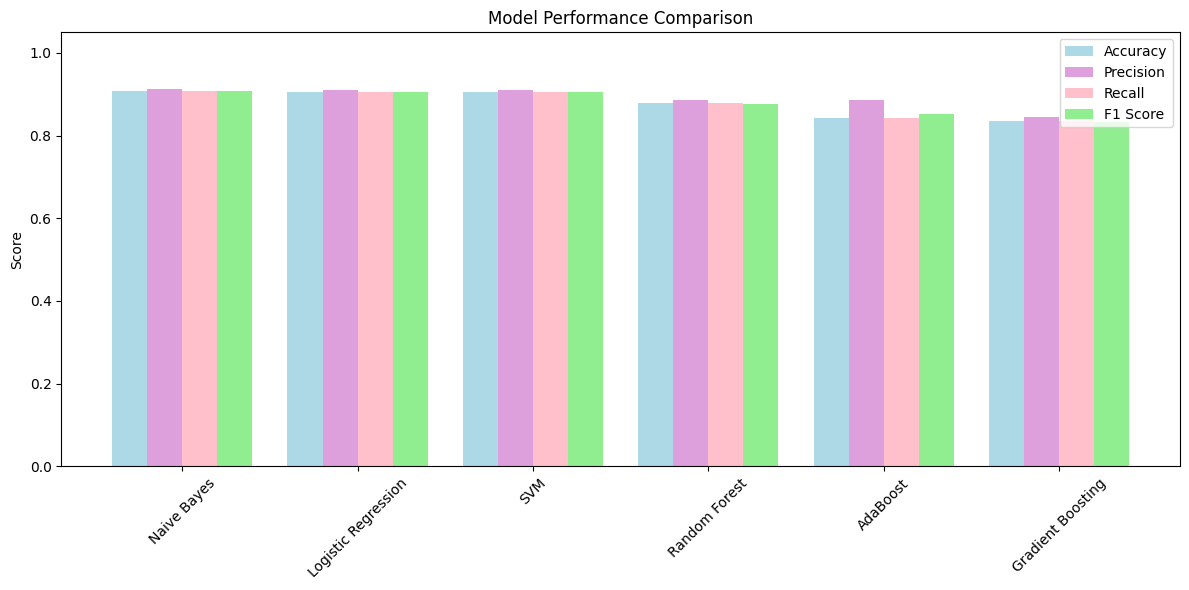

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Bar labels and metrics
models = result_df['Model']
x = np.arange(len(models))  # X locations for groups
width = 0.2                 # Width of each bar

# Metrics
accuracy  = result_df['Accuracy']
precision = result_df['Precision']
recall    = result_df['Recall']
f1_score  = result_df['F1_Score']

# Create the plot
plt.figure(figsize=(12, 6))
plt.bar(x - 1.5*width, accuracy,  width, label='Accuracy',color='lightblue')
plt.bar(x - 0.5*width, precision, width, label='Precision',color='plum')
plt.bar(x + 0.5*width, recall,    width, label='Recall',color='pink')
plt.bar(x + 1.5*width, f1_score,  width, label='F1 Score',color='lightgreen')

# Aesthetics
plt.xticks(x, models, rotation=45)
plt.ylim(0, 1.05)
plt.ylabel("Score")
plt.title("Model Performance Comparison")
plt.legend()
plt.tight_layout()
plt.show()


###     **6. Hyperparameter Tuning (Top 3 Models)**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

param_grid_nb = {
    'alpha': [0.1, 0.5, 1.0, 2.0, 5.0]
}

grid_nb = GridSearchCV(MultinomialNB(), param_grid_nb, cv=5, scoring='accuracy', n_jobs=-1)
grid_nb.fit(X_train, y_train)

print("Best Params - Naive Bayes:", grid_nb.best_params_)
print("Best Score:", grid_nb.best_score_)


Best Params - Naive Bayes: {'alpha': 0.1}
Best Score: 0.900824992417349


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
param_grid_lr = [
    {
        'penalty': ['l2'],
        'C': [0.01, 0.1, 1, 10],
        'solver': ['lbfgs', 'liblinear'],
        'max_iter': [100, 200]
    },
    {
        'penalty': ['l1'],
        'C': [0.01, 0.1, 1],
        'solver': ['liblinear', 'saga'],
        'max_iter': [100]
    },
    {
        'penalty': ['elasticnet'],
        'C': [0.01, 0.1, 1],
        'solver': ['saga'],
        'l1_ratio': [0.1, 0.5, 0.9],
        'max_iter': [100]
    }
]
grid_lr = GridSearchCV(LogisticRegression(), param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1)
grid_lr.fit(X_train, y_train)

print("Best Params - Logistic Regression:", grid_lr.best_params_)
print("Best Score:", grid_lr.best_score_)


Best Params - Logistic Regression: {'C': 0.01, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best Score: 0.900824992417349


In [ ]:
from sklearn.svm import SVC

param_grid_svc = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

grid_svc = GridSearchCV(SVC(), param_grid_svc, cv=5, scoring='accuracy', n_jobs=-1)
grid_svc.fit(X_train, y_train)

print("Best Params - SVM:", grid_svc.best_params_)
print("Best Score:", grid_svc.best_score_)


Best Params - SVM: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best Score: 0.900824992417349


###     **7. Saving the Best Model using joblib**

In [ ]:
import joblib

joblib.dump(nb_model, "job_role_model.joblib")
joblib.dump(tfidf, "tfidf_vectorizer.joblib")

['tfidf_vectorizer.joblib']

In [ ]:
from google.colab import files
files.download('job_role_model.joblib')
files.download('tfidf_vectorizer.joblib')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>